# Prosper loan dataset exploration

## Preliminary Wrangling
In this document I will be exploring the prosper loan dataset. A loan dataset that contains about 113937 rows.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
df = pd.read_csv("loan_data.csv")

In [3]:
# high level overview of data shape and composition
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
# Check basic descriptive info
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Examine columns, missing values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

From the info above we can see that there are some missing values but in this case we will only focus number of variables

In [6]:
intersted_in_columns = ['ListingKey', 'ListingNumber', 
        'Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'InvestmentFromFriendsAmount',
        'Investors',
        'BorrowerState']

In [7]:
loan_df = df[intersted_in_columns]

In [8]:
loan_df.head()

,ListingKey,ListingNumber,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,...,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,InvestmentFromFriendsAmount,Investors,BorrowerState
0,1021339766868145413AB3B,193129,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,...,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",0.0,258,CO
1,10273602499503308B223C1,1209647,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,...,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",0.0,1,CO
2,0EE9337825851032864889A,81716,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,...,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,0.0,41,GA
3,0EF5356002482715299901A,658116,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,...,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",0.0,158,GA
4,0F023589499656230C5E3E2,909464,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,...,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",0.0,20,MN


In [9]:
#Check uninque values for some categorical variables
loan_df['LoanStatus'].nunique()

12

In [10]:
loan_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [11]:
loan_df['Occupation'].nunique()

67

In [12]:
loan_df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [13]:
loan_df['EmploymentStatus'].nunique()

8

In [14]:
loan_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [15]:
loan_df['IncomeRange'].nunique()

8

In [16]:
loan_df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [17]:
# Start cleaning data process
loan_master_df = loan_df.copy()

In [18]:
loan_master_df['ListingKey'].duplicated().sum()

871

In [19]:
# It seems we have alot of duplicated let's get rid of them first
loan_master_df.drop_duplicates('ListingKey', inplace = True)

In [20]:
loan_master_df['ListingKey'].duplicated().sum()

0

In [21]:
loan_master_df.shape

(113066, 26)

In [22]:
loan_master_df.describe()

,ListingNumber,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,InvestmentFromFriendsAmount,Investors
count,1.130660e+05,113066.000000,83982.000000,113041.000000,113066.000000,83982.000000,83982.000000,113066.000000,105441.000000,1.130660e+05,113066.000000,113066.000000,104594.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.168870,0.218980,0.192946,4.068705,5.952871,2.776838,96.060584,5.605120e+03,271.932742,0.048379,0.276032,8314.762307,0.998573,16.678249,80.876143
std,3.273262e+05,10.421518,0.068607,0.080483,0.074917,1.675442,2.373897,3.998188,94.432241,7.495596e+03,192.549979,0.333580,0.553738,6237.007841,0.017987,295.674170,103.340277
min,4.000000e+00,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.000000,0.700000,0.000000,1.000000
25%,3.976670e+05,36.000000,0.116000,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.199396e+03,130.950000,0.000000,0.140000,4000.000000,1.000000,0.000000,2.000000
50%,5.978385e+05,36.000000,0.161620,0.209840,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.370000,0.000000,0.220000,6300.000000,1.000000,0.000000,44.000000
75%,8.849650e+05,36.000000,0.225300,0.283860,0.250600,5.000000,8.000000,3.000000,137.000000,6.824688e+03,370.570000,0.000000,0.320000,12000.000000,1.000000,0.000000,116.000000
max,1.255725e+06,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.000000,1.012500,25000.000000,1189.000000


In [23]:
loan_master_df.sample(40)

,ListingKey,ListingNumber,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,...,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,InvestmentFromFriendsAmount,Investors,BorrowerState
2198,8B55357342615768263D0BB,724813,60,Chargedoff,0.20850,0.26128,0.2359,3.0,D,3.0,...,5000.000000,285.30,0,0.29,10000,1.0000,"$50,000-74,999",0.0,1,CO
111461,84B53574014861025986A71,726866,60,Current,0.17020,0.21566,0.1914,4.0,C,5.0,...,3300.000000,390.26,0,0.44,15000,1.0000,"$25,000-49,999",0.0,102,TN
32463,662C3385423475365BCE30E,114706,36,Completed,NaN,0.09688,0.0900,NaN,NaN,NaN,...,4583.333333,123.54,0,0.18,3885,1.0000,"$50,000-74,999",0.0,105,ND
58173,BA083364686338833B087BA,28013,36,Completed,NaN,0.20735,0.2000,NaN,NaN,NaN,...,2881.833333,94.77,0,0.03,2550,1.0000,Not displayed,0.0,2,CA
52417,6A9B3430956467951FF4EB2,389927,36,Completed,NaN,0.24264,0.2200,NaN,NaN,NaN,...,1750.000000,64.92,0,0.05,1700,1.0000,"$1-24,999",0.0,93,WI
34028,D9333592158298812306CFE,955489,36,Current,0.10446,0.14714,0.1189,6.0,A,6.0,...,14166.666667,829.04,0,0.18,25000,1.0000,"$100,000+",0.0,1,MD
8796,03243485498748713774D36,461661,36,Completed,0.06310,0.25278,0.2300,2.0,E,9.0,...,5166.666667,94.48,0,0.21,2500,1.0000,"$50,000-74,999",0.0,102,CA
35466,85A333985962346588ED747,196614,36,Completed,NaN,0.12700,0.1200,NaN,NaN,NaN,...,2583.333333,365.36,0,0.49,11000,1.0000,"$25,000-49,999",0.0,305,IL
41975,9F893511207404669A49C71,500015,60,Chargedoff,0.25340,0.29371,0.2699,3.0,D,5.0,...,2000.000000,305.29,0,NaN,10000,1.0000,"$1-24,999",0.0,97,GA
53939,FCF43567394602407FA1FF7,690674,36,Current,0.21900,0.28780,0.2492,3.0,D,2.0,...,5375.000000,337.60,0,0.41,8500,1.0000,"$50,000-74,999",0.0,113,MI


From the dataframe decription we see that some columns like prosperRating and prosperScore have some NaN values so we drop all NaN records

In [24]:
loan_master_df.dropna(inplace = True)

In [25]:
loan_master_df.columns

Index(['ListingKey', 'ListingNumber', 'Term', 'LoanStatus',
       'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatus', 'Occupation',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
       'IncomeRange', 'InvestmentFromFriendsAmount', 'Investors',
       'BorrowerState'],
      dtype='object')

In [26]:
#Finally lets' rename some columns for convenience
loan_master_df.rename(columns = {'ProsperRating (numeric)': 'ProsperRating_numeric', 'ProsperRating (Alpha)':'ProsperRating_alpha',
                                'ListingCategory (numeric)':'ListingCategory_numeric'}, inplace = True)

In [27]:
loan_master_df.shape

(75486, 26)

Finally we have got a datafram of about 75486 rows and 26 columns to continue our analysis

### What is the structure of this dataset?

Originally the dataset contains about 113,937 entries and 81 columns, however after some selection and cleaning of records with NaN values the final dataset contains 75,486 and 26 columns

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the Loan outcome in the dataset. Some important features are BorrowerRate, loanStatus and investors.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that loan original amount and length of term will have strongest impact on BorrowerRate. I also expect that employment status and income range will have strong impact on investors: Most loan providers that specialize in consumer loans prefer traditionally employed borrowers, as opposed to self-employed borrowers or solopreneurs.

## Univariate Exploration

In [28]:
#First let's set the base color 
base_color = sb.color_palette()[0]

In [29]:
loan_master_df.columns

Index(['ListingKey', 'ListingNumber', 'Term', 'LoanStatus',
       'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_alpha', 'ProsperScore',
       'ListingCategory_numeric', 'EmploymentStatus', 'Occupation',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
       'IncomeRange', 'InvestmentFromFriendsAmount', 'Investors',
       'BorrowerState'],
      dtype='object')

In [30]:
#We will start our exploration with the loanStatus
loan_master_df.LoanStatus.value_counts()

Current                   50462
Completed                 17675
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

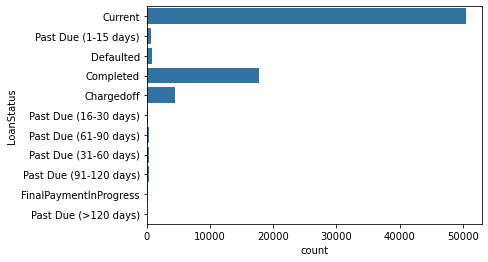

In [31]:
# Loan Status plotting
sb.countplot(data = loan_master_df, y = 'LoanStatus', color = base_color);

From the chart  above it can seen that most of loans are in current status while completed and charged off come next respectivly.

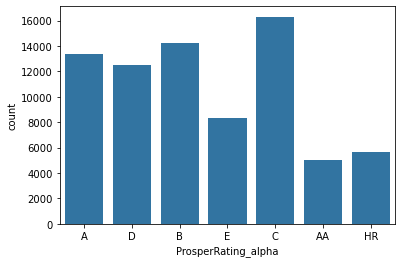

In [32]:
# ProsperRating_alpha plotting
sb.countplot(data = loan_master_df, x = 'ProsperRating_alpha', color = base_color);

The bar chart shows that C group has the highest rating B and A groups come next. AA and HR and the two groups with the least rating

In [33]:
loan_master_df.IncomeRange.value_counts()

$50,000-74,999    23432
$25,000-49,999    21219
$100,000+         13849
$75,000-99,999    13427
$1-24,999          3558
Not employed          1
Name: IncomeRange, dtype: int64

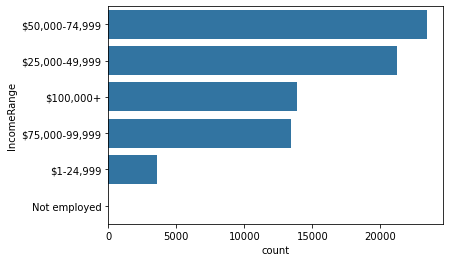

In [34]:
# incomeRange plotting
sb.countplot(data = loan_master_df, y = 'IncomeRange', color = base_color);

Most of the people in the dataset are in the middle income range groups, the 50,000-74,999 income range group has the highest borrowers and only about 4000 of the borrowers have income range below 25,000.

In [35]:
loan_master_df.EmploymentStatus.value_counts()

Employed         65159
Full-time         7576
Other             2189
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

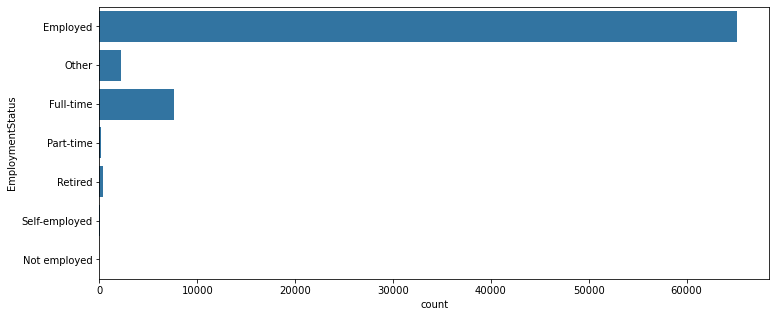

In [36]:
# Plotting for EmploymentStatus
plt.figure(figsize=[12, 5])
sb.countplot(data = loan_master_df, y = "EmploymentStatus", color = base_color);

Huge number of the dataste are employed accounting for the employed group plus the fultime group as well as the part time group since these group are alos employed technically. 

36    0.681835
60    0.299433
12    0.018732
Name: Term, dtype: float64 (75486, 26)
True     0.544353
False    0.455647
Name: IsBorrowerHomeowner, dtype: float64 (75486, 26)


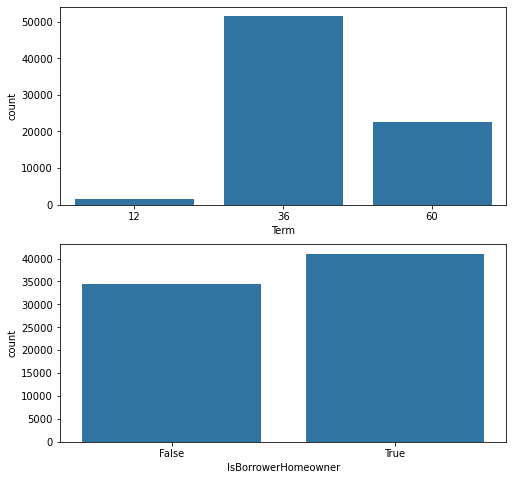

In [37]:
# Plot the rest of the importnat non-numeric variables
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.countplot(data = loan_master_df, x = 'Term', color = base_color, ax = ax[0]);
sb.countplot(data = loan_master_df, x = 'IsBorrowerHomeowner', color = base_color, ax = ax[1]);

print(loan_master_df.Term.value_counts()/75486, loan_master_df.shape)
print(loan_master_df.IsBorrowerHomeowner.value_counts()/75486, loan_master_df.shape)

About 68% of the 75,486 borrowers in the dataset opted for the 36 months term and about 30% of them have opted for the 69 months term and only about 1% have opted for the 12 months term. We also see that more borrowers are home owners, about 54% borrowers own homes.

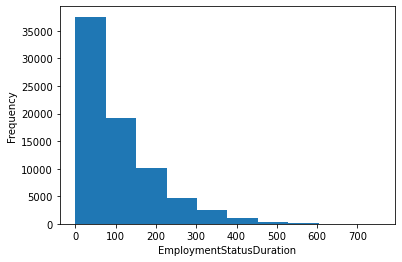

In [57]:
#binsize = 20 
#bins = np.arange(0, loan_master_df['EmploymentStatusDuration'].max()+binsize, binsize)
plt.hist(data = loan_master_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Frequency');

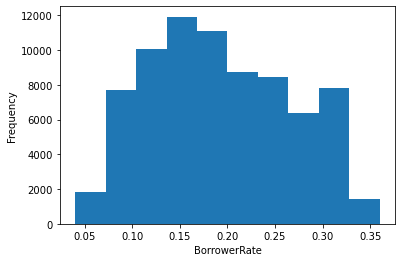

In [58]:
plt.hist(data = loan_master_df, x = 'BorrowerRate')
plt.xlabel('BorrowerRate');
plt.ylabel('Frequency');

The Borrower's interest rate for this loan seems to follow an approximately unimodal distribution, with the peak around 0.22. There seems to be a spike that occurs around 0.32.

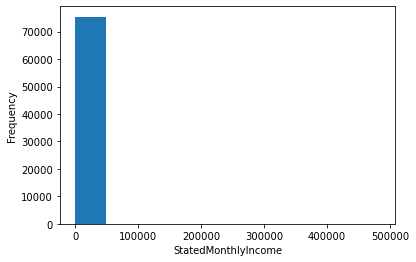

In [59]:
plt.hist(data = loan_master_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Frequency');

StatedMonthlyIncome is seemingly just one point with no tail, but let's see how it looks with log scale.

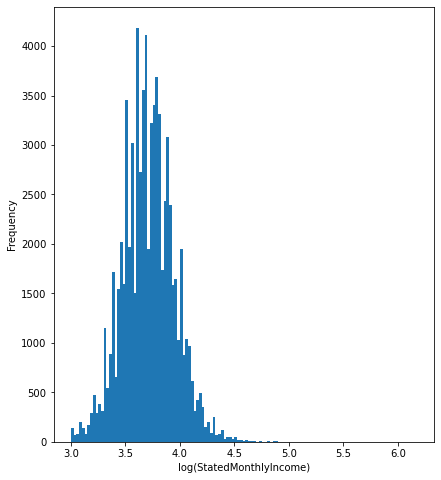

In [60]:
#Data log transformation
plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 2)
log_data = np.log10(loan_master_df['StatedMonthlyIncome']) # log transformation
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Frequency');

At the log scale transformation the monthly stated income data is unimodal with two peaks occuring about 3.4 and 3.8.

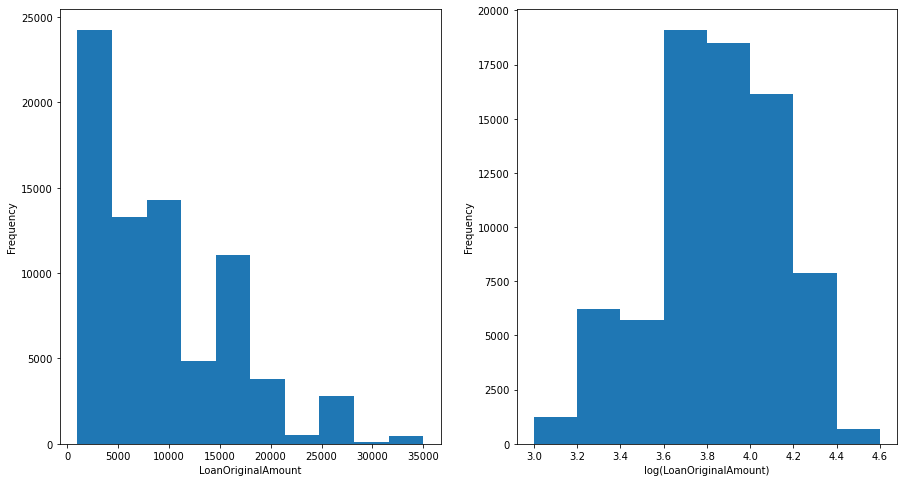

In [63]:
#Next lets see about the loan original amount
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
plt.hist(data = loan_master_df, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Frequency');

# Right histogram: data plotted in log scale transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_master_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Frequency');

The left histogram shows data in natural units, that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD. However after log transformation we see that data is somewhat unimodal with a peak starting at 3.8 and after that start declining.

<ipython-input-64-b5a82d284313>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['Investors_log'] = np.log10(loan_df['Investors'])


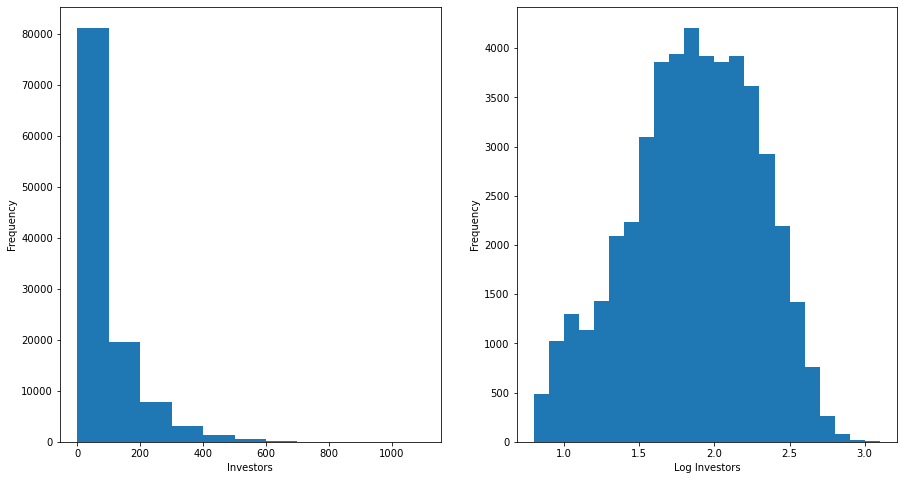

In [64]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_master_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel("Investors")
plt.ylabel('Frequency');
# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_master_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel("Log Investors")
plt.ylabel('Frequency');
loan_df['Investors_log'] = np.log10(loan_df['Investors'])

Majority of the investors are between 0 and 100 with L shaped chart. However, after log transfromation data seems to take a unimodal shape

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The variables of interst the BorrowerRate and investors both follow a unimodal idstribution although the investors needed to be log transformed. the majority of loans were in current status, completed and charged off being the next two highest status respectively. On the loanStatus variable no transformations were required.
Majority of the investors are between 0 and 100 with L shaped chart. However, after log transfromation data seems to take a unimodal shape



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
From the univarite exploration we can observe that some features had some interesting attributes, for example the Term length for most of the loan listings is the 36 months type, we also observed that most of the people had income range between 50,000-74,999 and 25,000,49,999 income range group coming next.
Some of feature varaibles in the dataset had skewness problem and after log trasnformation most variables seemed to follow some normality form. Variables like LoanOriginalAmount and StatedMonthlyIncome had to be log transformed.

## Bivariate Exploration

First lets start with pairwise correlation bewteen varaibles

In [44]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate',
                'ProsperRating_numeric', 'ProsperScore', 
                'ListingCategory_numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'Recommendations',  'LoanOriginalAmount', 'Investors' ]

categoric_vars = ['LoanStatus', 'ProsperRating_alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

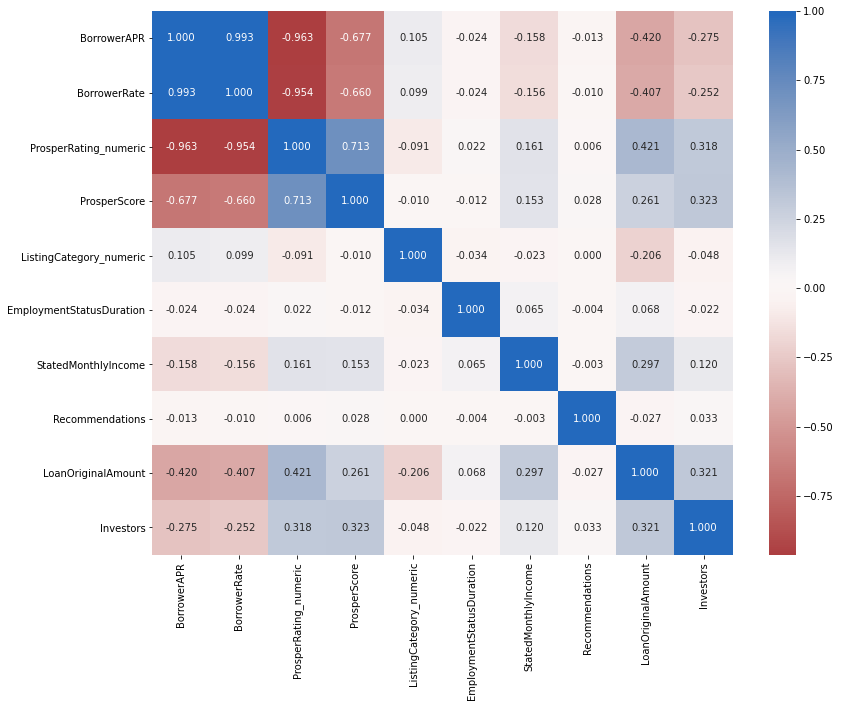

In [45]:
# correlation plot
plt.figure(figsize = [13, 10])
sb.heatmap(loan_master_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

BorrowerRate has negative and moderate correlation with prosperScore. This follows my expectations the higher the prosperScore the lower the risk and the lower the risk the lower the interst rate. <a href="https://www.thebalance.com/how-your-credit-score-influences-your-interest-rate-960278">This</a> confirms my expectations as well. As expected positive correlation was found between investors and stated monthly income but the correlation is weak one. Positive correlation was also found between invstors and propperScore indicating the higher the score the more investors a loan listing may have but once again this correlation is rather weak one.
As expected negative correlation was found between borrowerRate and loan origin amount, however,the correlation is rather weak. 

Oddly, aside from BorrowerAPR and BorrowerRate which are both negatively correlated with ProsperRating_numeric and ProsperScore  most of the other variables in the data set seem to have weak correlation.

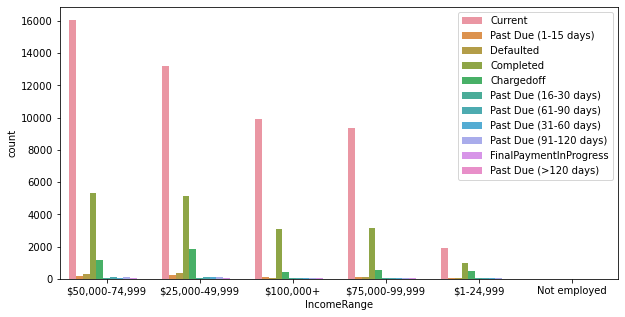

In [46]:
# Plotting between Credit Grade and Loan Status
plt.figure(figsize=(10, 5))
ax = sb.countplot(data = loan_master_df, x = 'IncomeRange', hue = 'LoanStatus')
ax.legend(loc = 1);

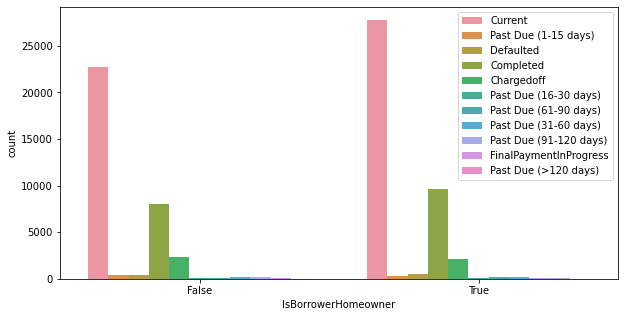

In [47]:
# Plotting between Credit Grade and Income Range
plt.figure(figsize=(10, 5))
ax = sb.countplot(data = loan_master_df, x = 'IsBorrowerHomeowner', hue = 'LoanStatus');
ax.legend(loc = 1);

From the two charts above it can be observed that the income range group of 50,000-74,999 has the higest loan status of current and most of the other groups has curren status as the highest as established before. In the second chart of loan status and is borrower home owner similar charectersitics can be observed.

Text(0.5, 1.0, 'Income Range vs Loan Amount')

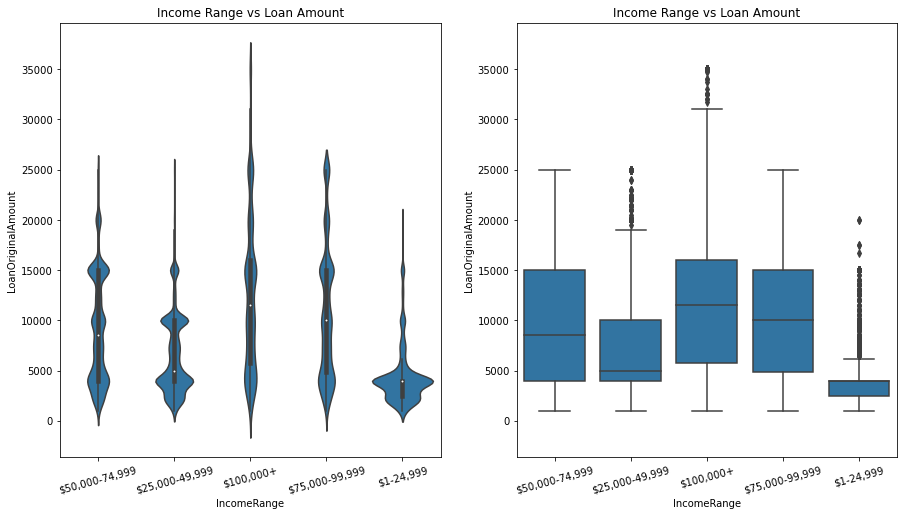

In [48]:
loan_df_sub = loan_master_df[(loan_master_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']

plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

Interestingly, it appears that there are some positive relationships between the income range and loan original amount. The borrower's with higher income range tend to borrow more money.

Text(0.5, 1.0, 'Employemnts status vs BorrowerRate ')

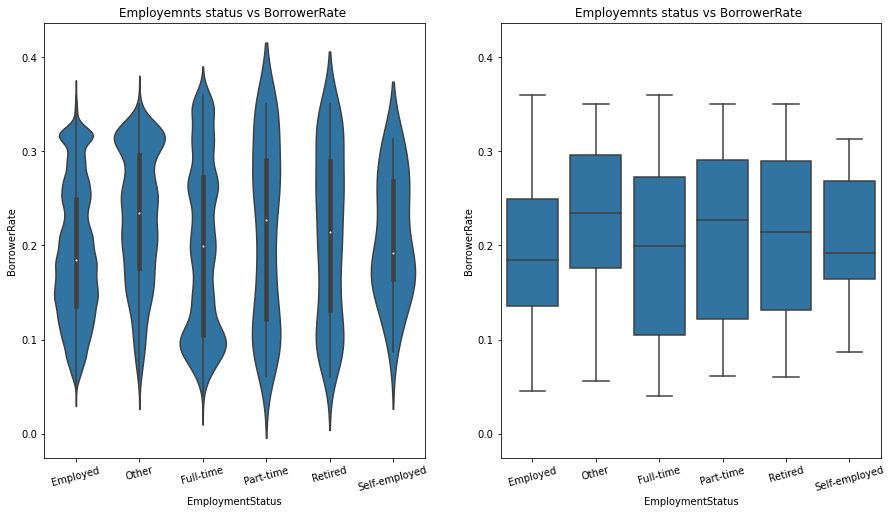

In [49]:
loan_df_sub = loan_master_df[(loan_master_df['BorrowerRate'] <= 10) ]
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 15);
plt.title('Employemnts status vs BorrowerRate ')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Employemnts status vs BorrowerRate ')

From the above boxplot it appears that fulltime and partime employees had highest rates while the group with lowes rates are the selef-employed no wonder the investors dont like them.

Text(0.5, 1.0, 'Term vs BorrowerRate ')

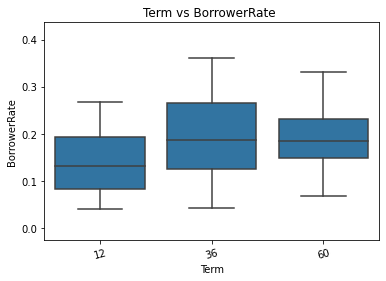

In [50]:
# box plot
sb.boxplot(data = loan_master_df, x = 'Term', y = 'BorrowerRate', color = base_color)
plt.ylim(ax1.get_ylim()) 
plt.xticks(rotation = 15);
plt.title('Term vs BorrowerRate ')

It seems that the longer the term the more interest rate and that is inline with what was expected. According to <a href="https://www.applepiecapital.com/franchise-forum/articles/what-is-more-important-term-or-rate/#:~:text=Lenders%20charge%20interest%20on%20the,far%20less%20than%20term%20lengths."> this</a> loan providers increas the intrest rate when the term is longer.

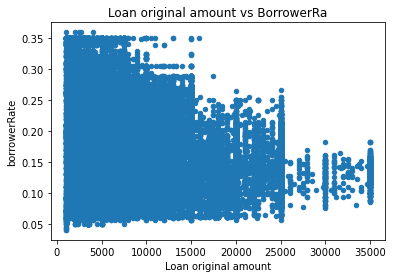

In [51]:
loan_master_df.plot.scatter(x = 'LoanOriginalAmount', y = 'BorrowerRate') 
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100}) 
plt.title("Loan original amount vs BorrowerRa") 
plt.xlabel('Loan original amount') 
plt.ylabel('borrowerRate') 
plt.show()



Similar to what the correlation heatmap above shows negative but weak correlation can be observed between BorrowerRa and loan original amount. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Borrower rate had moderate negative correlation with prosperScore. The prosper score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk socre, so the higher the risk the more interest rate it had attched. As expected negative correlation was found between borrower rate and loan origin amount implying that the more money borrowed the less interst attached.


- Expected relation was also found between borrower rate and loan original amount. Invsetors have positive correlation with prosper socre as expected i.e the higher the score - the lower the risk - the mpre investors it attracted.


- There were also some intersting relation observed between borrower rate and some categorical features. For the term and borrower rate positive correlation was found indicating that the longer the term the more interest rate and that is inline with what was expected. Usually loan providers increas the intrest rate when the term is longer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Income range is found to positively correlated with loan original amount and that is expected. This means that people with higher income range tend to borrow more money. There is also positive correlation found between stated monthly icnome and prosper score  which means people with more income are less riky for investors, thus they get more loans.



## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how some categorical measures like income range, length of loan term and employment status relate to borrowerRate or interst rates and loan original amount.

C:\Users\caaaq\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


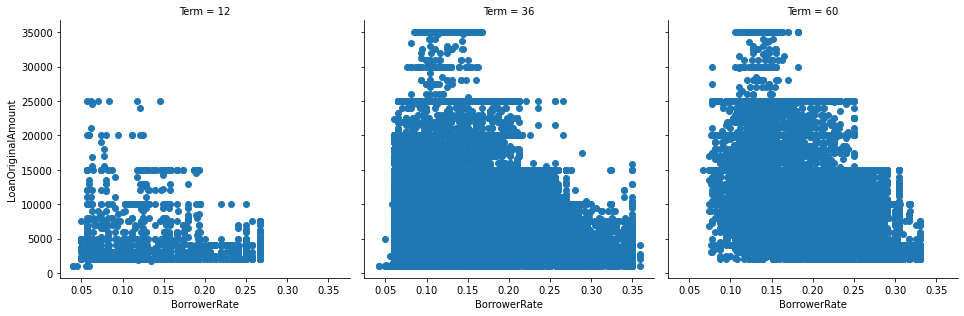

In [52]:
g = sb.FacetGrid(data = loan_master_df, col = 'Term', size = 4.5,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount')

Earlier we have established that there is a negative relation between the loan size and the interst rate and from the above charts it can be observed that the length of the term does not change much about this relation.

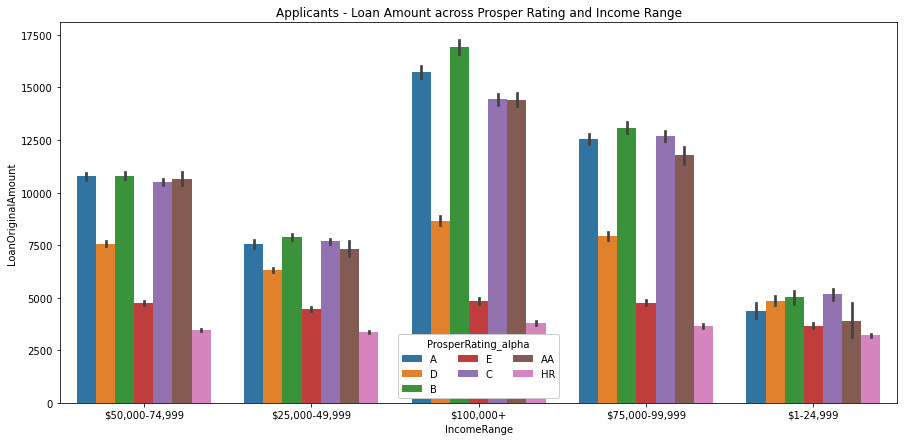

In [53]:
plt.figure(figsize = [15, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']
ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

The loan size or the loan original amount is postively related to the income range, the higher the income the more money borrowers tend to borrow. We can also observe that in almost all income range groups borrowers with B rating tend to take more money than any other rating while  borrowers with HR rating tend to borrow the least.

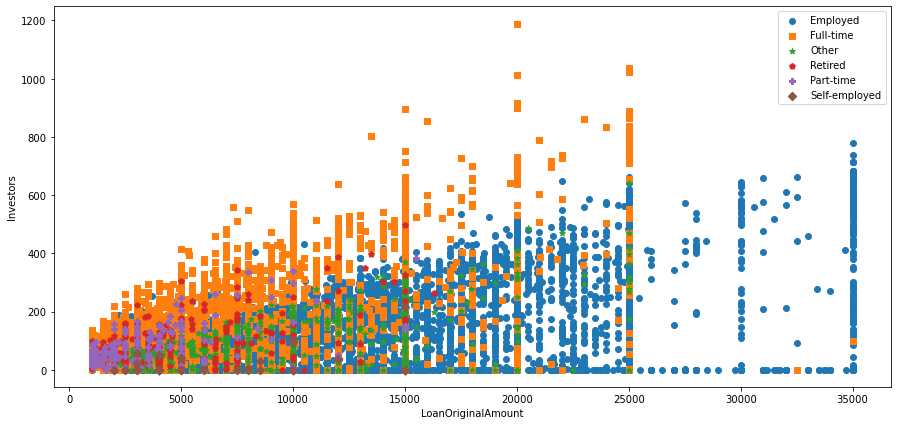

In [65]:
markers = [['Employed', 'o'],['Full-time', 's'] ,['Other', '*'] ,['Retired', 'p'] ,['Part-time', 'P'] ,['Self-employed', 'D']]
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']
plt.figure(figsize = [15, 7])
for cat, marker in markers:
    df_cat = loan_df_sub[loan_df_sub['EmploymentStatus'] == cat]
    plt.scatter(data = df_cat, x = 'LoanOriginalAmount', y = 'Investors', marker = marker)
plt.legend(['Employed','Full-time', 'Other', 'Retired', 'Part-time', 'Self-employed'])
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Investors');

The relation loan original amount and employment status is as expected, people who are employed tend to borrow more money as we see on the chart. On the other hand between investors and employment status, the employed borrowers tend to attract more invstors either employed ot full-time employed status.

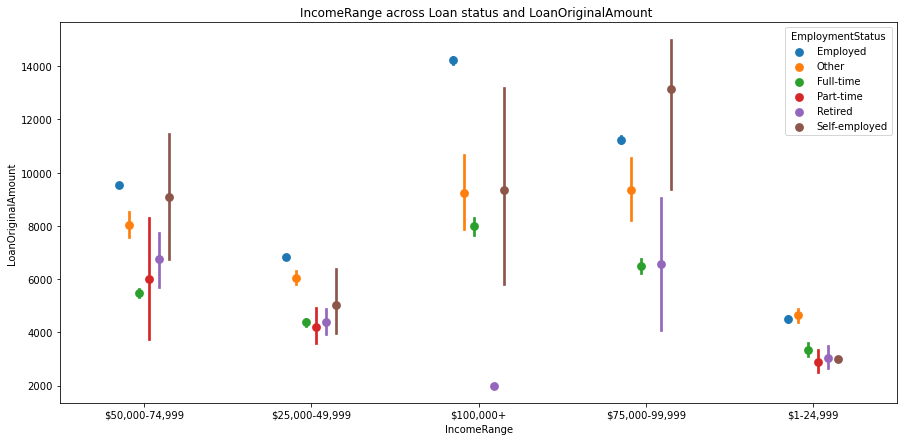

In [55]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
                  dodge = 0.3, linestyles = "");
plt.title('IncomeRange across Loan status and LoanOriginalAmount ');

C:\Users\caaaq\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


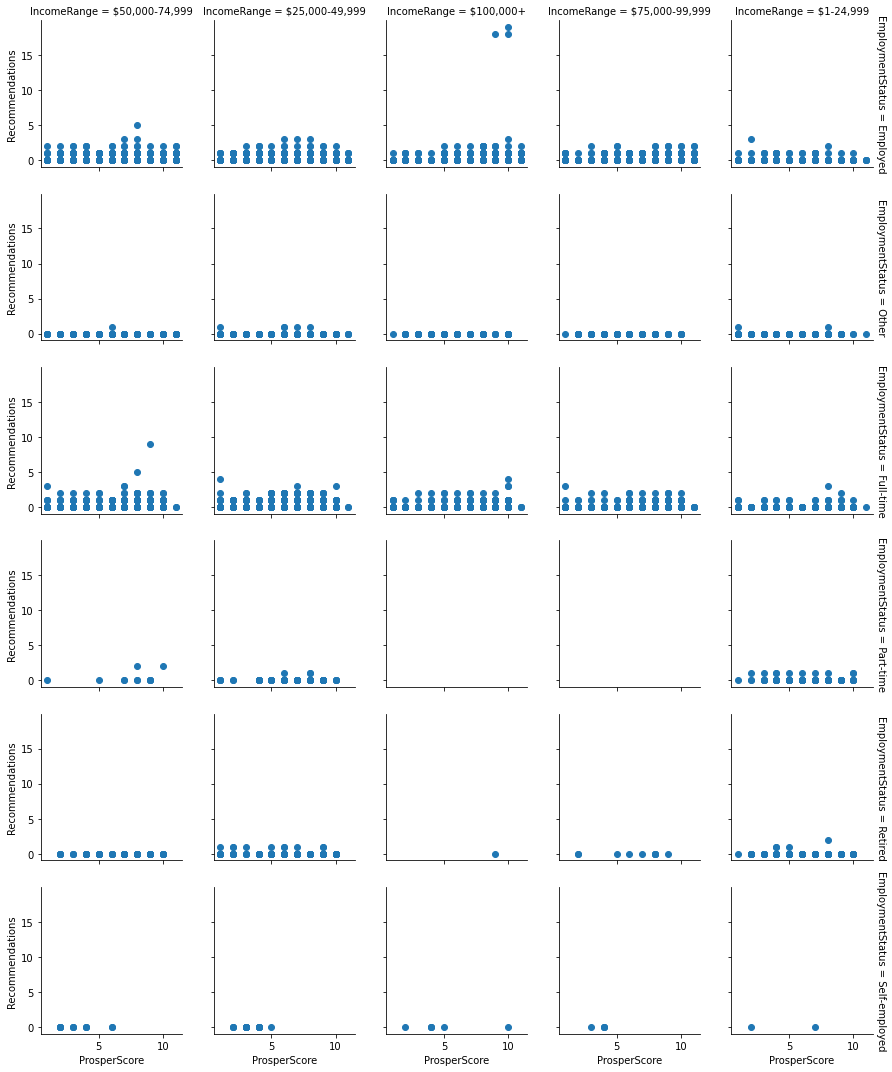

In [56]:
g = sb.FacetGrid(data = loan_df_sub, col = 'IncomeRange', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'ProsperScore', 'Recommendations')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation in this section by looking at the impact of some categorical features. The multivariate exploration here showed that there indeed is a negative relation between the loan size or loan original amount and interest rates regardless of the length of loan term. Loan size is also related to the borrower's employment status.Results show that people who are empoyed tend to borrow more money.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three  features except income range and loansize which as arelady establsihed are postively related. 
Looking back again at the facetgrid next no interaction was found between the four features investigated that is odd because it might seem that ones employment status would impact how many recommendation one got.